# DATA B6 : 	TOTALNSA
Data :  Advance Retail Sales: Gasoline Stations 
Period : From :Janvier 1988 to Décembre 2019
Frequency: Monthly

In [31]:
import pandas as pd
from statsmodels.tsa.tsatools import detrend
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import acf

In [32]:
#importation des données /chargement du fichier
B6= pd.read_csv('B6.csv',index_col=0)

In [33]:
#affichage des 5 premiers lignes
B6.head(5)

,TOTALNSA
DATE,
1976-01-01,885.2
1976-02-01,994.7
1976-03-01,1243.6
1976-04-01,1191.2
1976-05-01,1203.2


In [34]:
#affichage des 3 derniers lignes
B6.tail(3)

,TOTALNSA
DATE,
2022-02-01,1077.895
2022-03-01,1295.346
2022-04-01,1264.435


In [35]:
#decouverte des données
str(B6)

'            TOTALNSA\nDATE                \n1976-01-01   885.200\n1976-02-01   994.700\n1976-03-01  1243.600\n1976-04-01  1191.200\n1976-05-01  1203.200\n...              ...\n2021-12-01  1251.035\n2022-01-01  1022.365\n2022-02-01  1077.895\n2022-03-01  1295.346\n2022-04-01  1264.435\n\n[556 rows x 1 columns]'

In [36]:
# vérifions 
print(type(B6))

<class 'pandas.core.frame.DataFrame'>


In [37]:
#dimensions : nombre de lignes, nombre de colonnes
print(B6.shape)

(556, 1)


In [38]:
#Les noms des colonnes
print(B6.columns)

Index(['TOTALNSA'], dtype='object')


# la saisonnalité : existence et périodicité¶
La Saisonnalité est, dans les données de séries chronologiques, la présence de variations qui se produisent à des intervalles de temps réguliers spécifiques, tels que hebdomadaires, mensuels ou trimestriels.

<AxesSubplot:xlabel='DATE'>

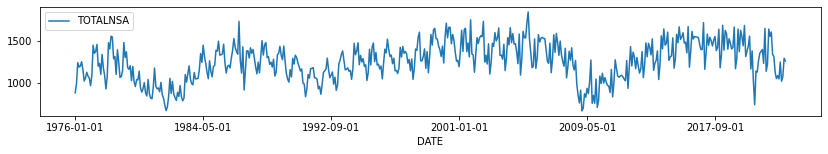

In [39]:
B6.plot(figsize=(14,2))

<AxesSubplot:xlabel='DATE'>

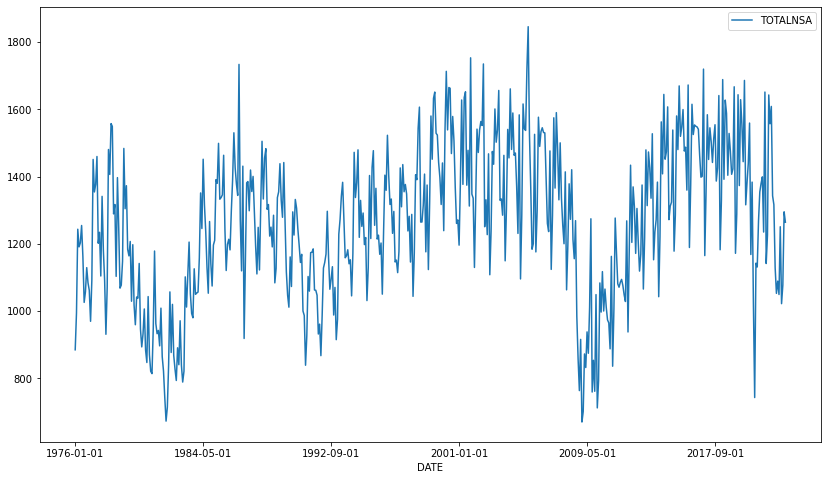

In [40]:
B6.plot(figsize=(14,8))

# Saisonnalité:
la composante saisonnalité présente une tendance qui se répète en ce qui concerne le moment, la direction et l’ampleur. 

<AxesSubplot:xlabel='DATE'>

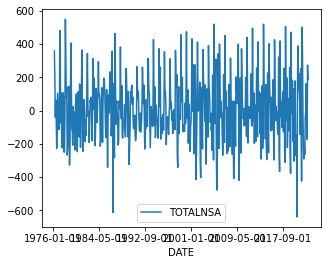

In [41]:
B6.diff(2).plot(figsize=(5,4))

<AxesSubplot:xlabel='DATE'>

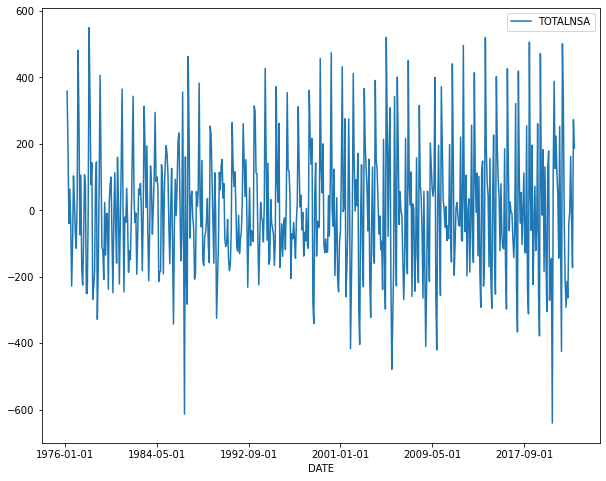

In [42]:
B6.diff(2).plot(figsize=(10, 8))

In [43]:
 #On vérifie pour la période.
from statsmodels.tsa.stattools import acf
cor = acf(B6.TOTALNSA)
cor

array([1.        , 0.69945956, 0.64039184, 0.61128351, 0.48191309,
       0.46149345, 0.40353004, 0.43507061, 0.43261209, 0.53721869,
       0.52675651, 0.55786173, 0.74467556, 0.5220554 , 0.50827082,
       0.46768044, 0.34984343, 0.33242464, 0.26552346, 0.2923926 ,
       0.29274681, 0.37049328, 0.36493202, 0.40110931, 0.5385853 ,
       0.34439357, 0.31624084, 0.26338516, 0.16490401, 0.13513114,
       0.06517347, 0.09497267, 0.09765187, 0.17687266, 0.18589936,
       0.21171079, 0.34906636, 0.1763414 , 0.13104664, 0.08760081,
       0.00299299])

# Tendance¶
La tendance est une structure décrivant la hausse ou la baisse à long terme d'une variable numérique.


In [44]:
from statsmodels.api import OLS
import numpy
y = B6.TOTALNSA
X = numpy.ones((len(y), 2))
X[:,1] = numpy.arange(0,len(y))
reg = OLS(y,X)
results = reg.fit()
results.params

const    1130.689518
x1          0.471795
dtype: float64

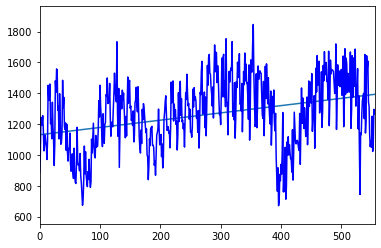

In [45]:
from statsmodels.graphics.regressionplots import abline_plot
fig = abline_plot(model_results=results)
ax = fig.axes[0]
ax.plot(X[:,1], y, 'b')
ax.margins(.1)

# Prédictions linéaires¶
On sort ici du cadre linéaire pour utiliser le machine learning non linéaire pour faire de la prédiction. Pour éviter les trop gros problèmes de tendance, on travaillera sur la série différenciée. En théorie, il faudrait différencier jusqu’à ce qu’on enlève la tendance


In [46]:
B6["diff"] = numpy.nan
B6.loc[1:, "diff"] = (B6.iloc[1:, 1].values - B6.iloc[:len(B6)-1, 1].values)
pd.concat([B6.head(n=3), B6.tail(n=5)])

,TOTALNSA,diff
DATE,,
1976-01-01,885.200,NaN
1976-02-01,994.700,NaN
1976-03-01,1243.600,NaN
2021-12-01,1251.035,NaN
2022-01-01,1022.365,NaN
2022-02-01,1077.895,NaN
2022-03-01,1295.346,NaN
2022-04-01,1264.435,NaN


# Auto-corrélation¶

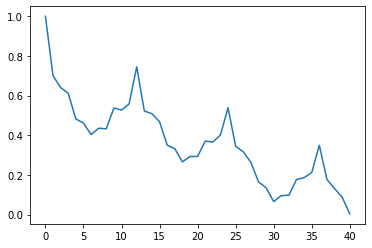

In [47]:
plt.plot(cor)

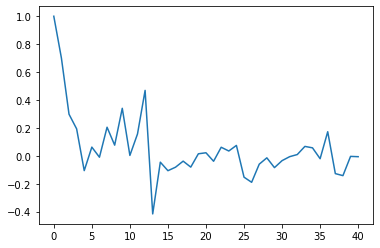

In [48]:
from statsmodels.tsa.stattools import pacf
pcor = pacf(B6.)
plt.plot(pcor)

# ARIMA: 
Modèle ARIMA pour la prévision de séries temporelles
ARIMA signifie modèle de moyenne mobile intégré autorégressif et est spécifié par trois paramètres d’ordre: (p, d, q).

In [49]:
pip install pmdarima